<a href="https://colab.research.google.com/github/GabrieloFranco/Data-Science-FIAP-2semestre/blob/main/checkpoint2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Checkpoint 2 - Análise Covid Brasil
## nome: Gabriel Franco J Silva RM:97574
## nome: Giuliano S. da Silva RM:97676
## nome: Kelvin Mathias da Silva  RM:98137
## nome: Carlos Augusto Neto RM: 95856
## nome: RM:
## nome: RM:
## nome: RM:


## Carregar módulos

In [ ]:
import numpy as np
import pandas as pd

## Carregar dados

- Dados Covid Brasil

In [ ]:
! wget --no-check-certificate --content-disposition 'https://github.com/wcota/covid19br/blob/master/cases-brazil-cities-time.csv.gz?raw=true'

--2023-10-05 18:44:37--  https://github.com/wcota/covid19br/blob/master/cases-brazil-cities-time.csv.gz?raw=true
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/wcota/covid19br/raw/master/cases-brazil-cities-time.csv.gz [following]
--2023-10-05 18:44:37--  https://github.com/wcota/covid19br/raw/master/cases-brazil-cities-time.csv.gz
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-cities-time.csv.gz [following]
--2023-10-05 18:44:37--  https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-cities-time.csv.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|18

In [ ]:
! gunzip cases-brazil-cities-time.csv.gz

gzip: cases-brazil-cities-time.csv already exists; do you wish to overwrite (y or n)? ^C


In [ ]:
dados_brasil = pd.read_csv('cases-brazil-cities-time.csv')

- Dados censo

In [ ]:
dados_censo = pd.read_csv('dados_municipios_2010.csv', sep = ';', decimal = ',', encoding = 'latin1')


In [ ]:
dados_censo

## Ajustar dados

In [ ]:
max_date = max(dados_brasil['date'])

In [ ]:
dados_brasil = dados_brasil[(dados_brasil['date'] == max_date) & \
                            (dados_brasil['state'] != 'TOTAL')]

In [ ]:
cols = ['ibgeID', 'date', 'state', 'city', 'totalCases', 'deaths']

In [ ]:
dados_brasil = dados_brasil[cols].reset_index(drop=True)

In [ ]:
dados_brasil

,ibgeID,date,state,city,totalCases,deaths
0,5200050,2023-03-18,GO,Abadia de Goiás/GO,4074,50
1,3100104,2023-03-18,MG,Abadia dos Dourados/MG,1943,21
2,5200100,2023-03-18,GO,Abadiânia/GO,2218,55
3,1500107,2023-03-18,PA,Abaetetuba/PA,12009,244
4,3100203,2023-03-18,MG,Abaeté/MG,4279,51
...,...,...,...,...,...,...
5591,4301552,2023-03-18,RS,Áurea/RS,665,7
5592,4101150,2023-03-18,PR,Ângulo/PR,967,11
5593,2900504,2023-03-18,BA,Érico Cardoso/BA,2467,53
5594,1505106,2023-03-18,PA,Óbidos/PA,8717,166


## Aqui começa o trabalho

#1 – Realizar o join com o dataframe “dados_brasil” com o dataframe “dados_censo”

In [ ]:
# Realizar o join
dados_completos = pd.merge(dados_brasil, dados_censo, how='inner', left_on='ibgeID', right_on='ibgeID')

In [ ]:
dados_completos

,ibgeID,date,state,city,totalCases,deaths,Municipio,ESPVIDA,E_ANOSESTUDO,T_ANALF18M,RDPC,IDHM
0,5200050,2023-03-18,GO,Abadia de Goiás/GO,4074,50,ABADIA DE GOIÁS,74.82,7.94,8.36,574.96,0.708
1,3100104,2023-03-18,MG,Abadia dos Dourados/MG,1943,21,Abadia dos Dourados,75.35,8.68,9.67,596.18,0.689
2,5200100,2023-03-18,GO,Abadiânia/GO,2218,55,ABADIÂNIA,75.46,9.31,11.67,519.87,0.689
3,1500107,2023-03-18,PA,Abaetetuba/PA,12009,244,ABAETETUBA,72.89,8.99,14.97,293.01,0.628
4,3100203,2023-03-18,MG,Abaeté/MG,4279,51,Abaeté,75.90,9.19,9.28,707.24,0.698
...,...,...,...,...,...,...,...,...,...,...,...,...
5560,4301552,2023-03-18,RS,Áurea/RS,665,7,ÁUREA,75.48,9.06,5.76,686.10,0.707
5561,4101150,2023-03-18,PR,Ângulo/PR,967,11,ÂNGULO,74.62,9.54,12.11,641.37,0.721
5562,2900504,2023-03-18,BA,Érico Cardoso/BA,2467,53,ÉRICO CARDOSO,70.47,8.68,32.52,258.28,0.584
5563,1505106,2023-03-18,PA,Óbidos/PA,8717,166,ÓBIDOS,70.35,8.89,13.73,255.03,0.594


#2 – Qual seria o tamanho de amostra para uma pesquisa em todos os municípios do Brasil contidos no dataframe? (Utilizar a variância da renda per capita como base da fórmula de amostragem, z = 1,96 e margem de erro = 20).

In [ ]:
# Calcular tamanho de amostra para o Brasil
variancia_renda_br = dados_completos['RDPC'].var()

In [ ]:
print("variancia de renda do Brasil:")
print(variancia_renda_br)

tamanho de amostras do Brasil:
59179.968507010206


In [ ]:
# Filtrar dados para São Paulo
dados_sp = dados_completos[dados_completos['state'] == 'SP']

In [ ]:
# Calcular tamanho de amostra para São Paulo
variancia_renda_sp = dados_sp['RDPC'].var()

In [73]:
print("variancia de renda de SP:")
print(variancia_renda_sp)

tamanho de amostras de SP:
38966.076972770956


In [ ]:
# Calcular tamanho de amostra para o Brasil
variancia_renda_br = dados_completos['RDPC'].var()
z_valor = 1.96  # para um intervalo de confiança de 95%
margem_erro = 20

tamanho_amostra_br = ((z_valor**2) * variancia_renda_br) / (margem_erro**2)

In [74]:
print("tamanho de amostras do Brasil:")
print(tamanho_amostra_br)

tamanho de amostras do Brasil:
568.364417541326


#3 – Qual seria o tamanho da amostra para São Paulo? (Utilizar a variância da renda per capita como base da fórmula de amostragem, z = 1,96 e margem de erro = 20)

In [ ]:
# Filtrar dados para São Paulo
dados_sp = dados_completos[dados_completos['state'] == 'SP']

# Calcular tamanho de amostra para São Paulo
variancia_renda_sp = dados_sp['RDPC'].var()
tamanho_amostra_sp = ((z_valor**2) * variancia_renda_sp) / (margem_erro**2)

In [75]:
print("tamanho de amostras de SP:")
print(tamanho_amostra_sp)

tamanho de amostras de SP:
374.23020324649224


#4 – Agora que possui os tamanhos de amostra para o Brasil (n_br) e para São Paulo (n_sp), criar um dataframe para a amostra do Brasil e outro dataframe para amostra de São Paulo. (utilizar o método da amostra aleatória simples)


In [ ]:
# Criar dataframes de amostra para o Brasil e São Paulo
dados_amostra_br = dados_completos.sample(int(tamanho_amostra_br))
dados_amostra_sp = dados_sp.sample(int(tamanho_amostra_sp))

In [ ]:
dados_amostra_br

,ibgeID,date,state,city,totalCases,deaths,Municipio,ESPVIDA,E_ANOSESTUDO,T_ANALF18M,RDPC,IDHM
5445,1508209,2023-03-18,PA,Vigia/PA,3999,96,VIGIA,71.06,8.75,10.81,323.12,0.617
4336,2209104,2023-03-18,PI,Santa Cruz do Piauí/PI,886,15,SANTA CRUZ DO PIAUÍ,68.22,9.56,37.82,278.49,0.601
3043,5005608,2023-03-18,MS,Miranda/MS,4565,105,MIRANDA,71.91,8.62,13.51,424.44,0.632
2524,3525300,2023-03-18,SP,Jaú/SP,24058,617,JAÚ,78.13,10.30,4.92,951.17,0.778
1403,5206206,2023-03-18,GO,Cristalina/GO,9322,132,CRISTALINA,73.84,9.46,9.81,686.90,0.699
...,...,...,...,...,...,...,...,...,...,...,...,...
493,2301950,2023-03-18,CE,Barreira/CE,2484,56,BARREIRA,71.25,9.57,29.72,246.69,0.616
4232,4316303,2023-03-18,RS,Roque Gonzales/RS,1370,12,ROQUE GONZALES,75.55,10.57,7.49,575.83,0.688
4524,2110302,2023-03-18,MA,Santo Antônio dos Lopes/MA,2266,30,SANTO ANTÔNIO DOS LOPES,67.86,8.51,33.37,240.20,0.566
884,4103800,2023-03-18,PR,Cambira/PR,2855,33,CAMBIRA,75.09,10.61,9.48,630.19,0.725


In [ ]:
dados_amostra_sp

,ibgeID,date,state,city,totalCases,deaths,Municipio,ESPVIDA,E_ANOSESTUDO,T_ANALF18M,RDPC,IDHM
1160,3508504,2023-03-18,SP,Caçapava/SP,16464,332,CAÇAPAVA,76.50,10.94,4.38,871.87,0.788
5337,3555703,2023-03-18,SP,União Paulista/SP,319,7,UNIÃO PAULISTA,76.75,11.47,12.76,610.77,0.749
363,3503802,2023-03-18,SP,Artur Nogueira/SP,9168,170,ARTUR NOGUEIRA,74.63,9.93,5.83,823.24,0.749
779,3504800,2023-03-18,SP,Bálsamo/SP,3150,78,BÁLSAMO,75.08,11.08,7.93,832.51,0.756
370,3503950,2023-03-18,SP,Aspásia/SP,622,12,ASPÁSIA,76.83,12.18,14.24,619.43,0.735
...,...,...,...,...,...,...,...,...,...,...,...,...
3760,3538204,2023-03-18,SP,Pinhalzinho/SP,2731,35,PINHALZINHO,73.49,10.85,7.97,652.43,0.725
3541,3535903,2023-03-18,SP,Paranapuã/SP,1270,29,PARANAPUÃ,75.52,11.51,11.39,670.18,0.732
1256,3512001,2023-03-18,SP,Colina/SP,2614,73,COLINA,75.71,10.29,6.54,706.69,0.757
5364,3556008,2023-03-18,SP,Urupês/SP,938,54,URUPÊS,74.03,11.24,7.08,805.66,0.745


#5 – Agora que possui os dataframes de Brasil (dados_amostra_br) e São Paulo(dados_amostra_sp), realizar as seguintes análises:


a) Obter as medidas descritivas: média, desvio padrão, primeiro, segundo e terceiro quartil
para o número de infectados.

In [ ]:
# Medidas descritivas para o número de infectados
descritivas_infectados_br = dados_amostra_br['totalCases'].describe()
descritivas_infectados_sp = dados_amostra_sp['totalCases'].describe()

In [ ]:
descritivas_infectados_br

count       568.000000
mean       6693.338028
std       24662.879036
min          16.000000
25%         889.000000
50%        1837.000000
75%        4631.500000
max      465583.000000
Name: totalCases, dtype: float64

In [ ]:
descritivas_infectados_sp

count    3.740000e+02
mean     1.205987e+04
std      6.269857e+04
min      1.240000e+02
25%      8.792500e+02
50%      2.598500e+03
75%      7.953250e+03
max      1.155814e+06
Name: totalCases, dtype: float64

b) Obter as medidas descritivas: média, desvio padrão, primeiro, segundo e terceiro quartil
para o número de mortes.


In [ ]:
# Medidas descritivas para o número de mortes
descritivas_mortes_br = dados_amostra_br['deaths'].describe()
descritivas_mortes_sp = dados_amostra_sp['deaths'].describe()

In [ ]:
descritivas_mortes_br

count     568.000000
mean      109.751761
std       429.800429
min         0.000000
25%        12.000000
50%        25.000000
75%        68.000000
max      8037.000000
Name: deaths, dtype: float64

In [ ]:
descritivas_mortes_sp

count      374.000000
mean       331.732620
std       2355.920452
min          2.000000
25%         21.000000
50%         52.000000
75%        163.000000
max      44671.000000
Name: deaths, dtype: float64

c) Gerar um histograma par o número de infectados e mortes. O desenho do histograma
é similar com alguma das distribuições apresentadas?

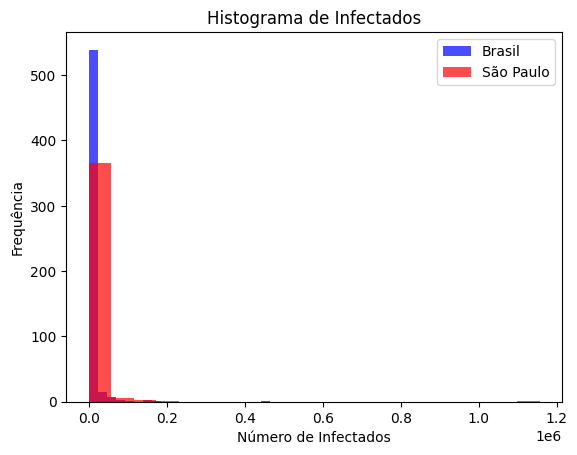

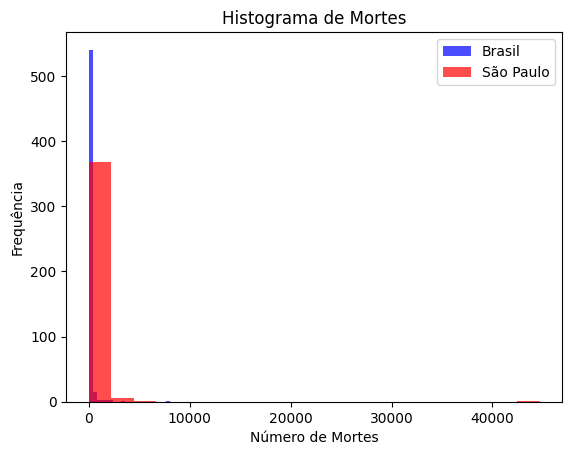

In [ ]:
import matplotlib.pyplot as plt

# Histograma para o número de infectados
plt.hist(dados_amostra_br['totalCases'], bins=20, color='blue', alpha=0.7, label='Brasil')
plt.hist(dados_amostra_sp['totalCases'], bins=20, color='red', alpha=0.7, label='São Paulo')
plt.title('Histograma de Infectados')
plt.xlabel('Número de Infectados')
plt.ylabel('Frequência')
plt.legend()
plt.show()

# Histograma para o número de mortes
plt.hist(dados_amostra_br['deaths'], bins=20, color='blue', alpha=0.7, label='Brasil')
plt.hist(dados_amostra_sp['deaths'], bins=20, color='red', alpha=0.7, label='São Paulo')
plt.title('Histograma de Mortes')
plt.xlabel('Número de Mortes')
plt.ylabel('Frequência')
plt.legend()
plt.show()


d) Compare os resultados de Brasil e SP.

In [ ]:
# Comparação dos resultados para Brasil e SP
comparacao_infectados = pd.DataFrame({
    'Brasil': descritivas_infectados_br,
    'São Paulo': descritivas_infectados_sp
})

comparacao_mortes = pd.DataFrame({
    'Brasil': descritivas_mortes_br,
    'São Paulo': descritivas_mortes_sp
})

# Exibir comparação
print("Comparação de Infectados:")
print(comparacao_infectados)

print("\nComparação de Mortes:")
print(comparacao_mortes)


Comparação de Infectados:
              Brasil     São Paulo
count     568.000000  3.740000e+02
mean     6693.338028  1.205987e+04
std     24662.879036  6.269857e+04
min        16.000000  1.240000e+02
25%       889.000000  8.792500e+02
50%      1837.000000  2.598500e+03
75%      4631.500000  7.953250e+03
max    465583.000000  1.155814e+06

Comparação de Mortes:
            Brasil     São Paulo
count   568.000000    374.000000
mean    109.751761    331.732620
std     429.800429   2355.920452
min       0.000000      2.000000
25%      12.000000     21.000000
50%      25.000000     52.000000
75%      68.000000    163.000000
max    8037.000000  44671.000000
